In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('C:\\Users\\GIRISH CHANDRA\\6th SEM AI&ML\\ML MINI PROJECT\\Bitcoin.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-25,29653.134766,30157.785156,29384.949219,29562.361328,29562.361328,27525063551
1,2022-05-26,29564.777344,29834.160156,28261.906250,29267.224609,29267.224609,36774325352
2,2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,28627.574219,36582005748
3,2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,28814.900391,35519577634
4,2022-05-29,29019.867188,29498.009766,28841.107422,29445.957031,29445.957031,18093886409


In [3]:
df.shape

(366, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,22334.659889,22739.377129,21908.673631,22325.490373,22325.490373,2.730775e+10
std,4162.593715,4250.736604,4063.916388,4150.876927,4150.876927,1.288153e+10
min,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,7.044911e+09
25%,19326.514648,19636.722168,19025.690430,19325.394043,19325.394043,1.812254e+10
50%,21528.958985,21803.812500,20959.862305,21531.104492,21531.104492,2.594294e+10
75%,24738.201172,25228.042969,24302.009765,24719.875000,24719.875000,3.255026e+10
max,31792.554688,32249.863281,31286.154297,31792.310547,31792.310547,1.189925e+11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


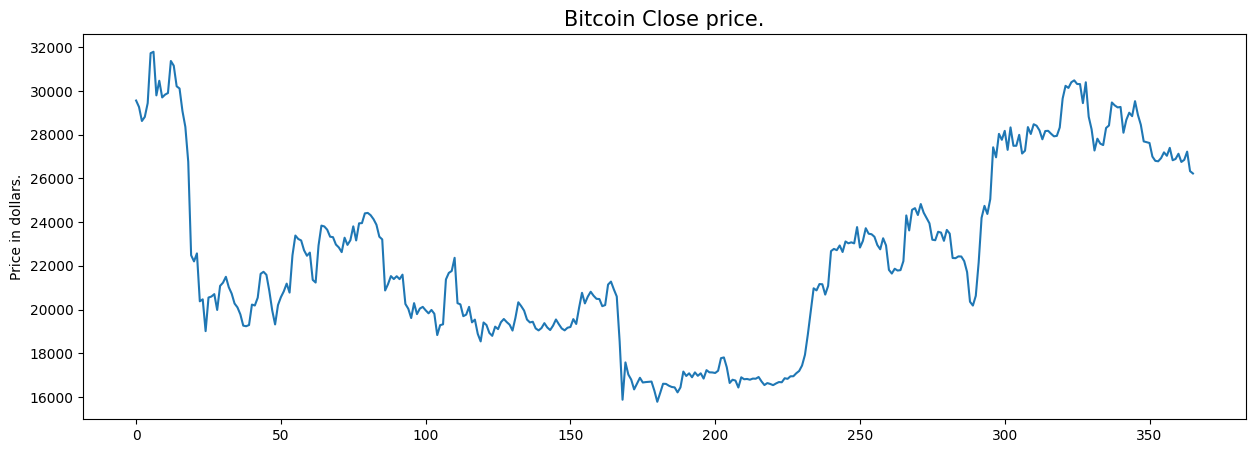

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [7]:
df[df['Close'] == df['Adj Close']].shape, df.shape

((366, 7), (366, 7))

In [8]:
df = df.drop(['Adj Close'], axis=1)

In [9]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

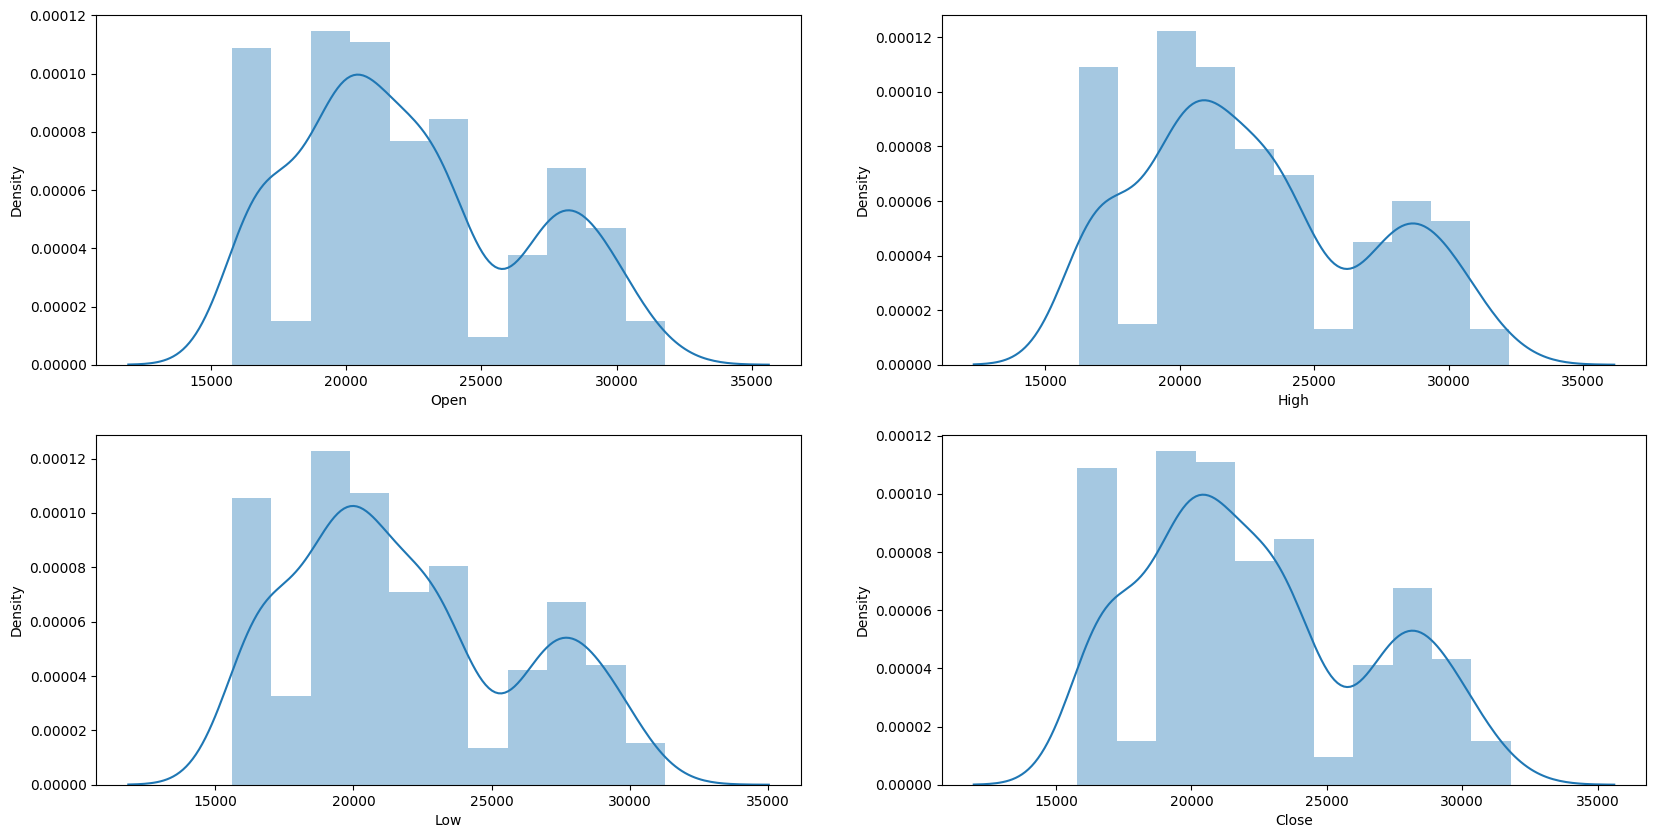

In [10]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df[col])
plt.show()

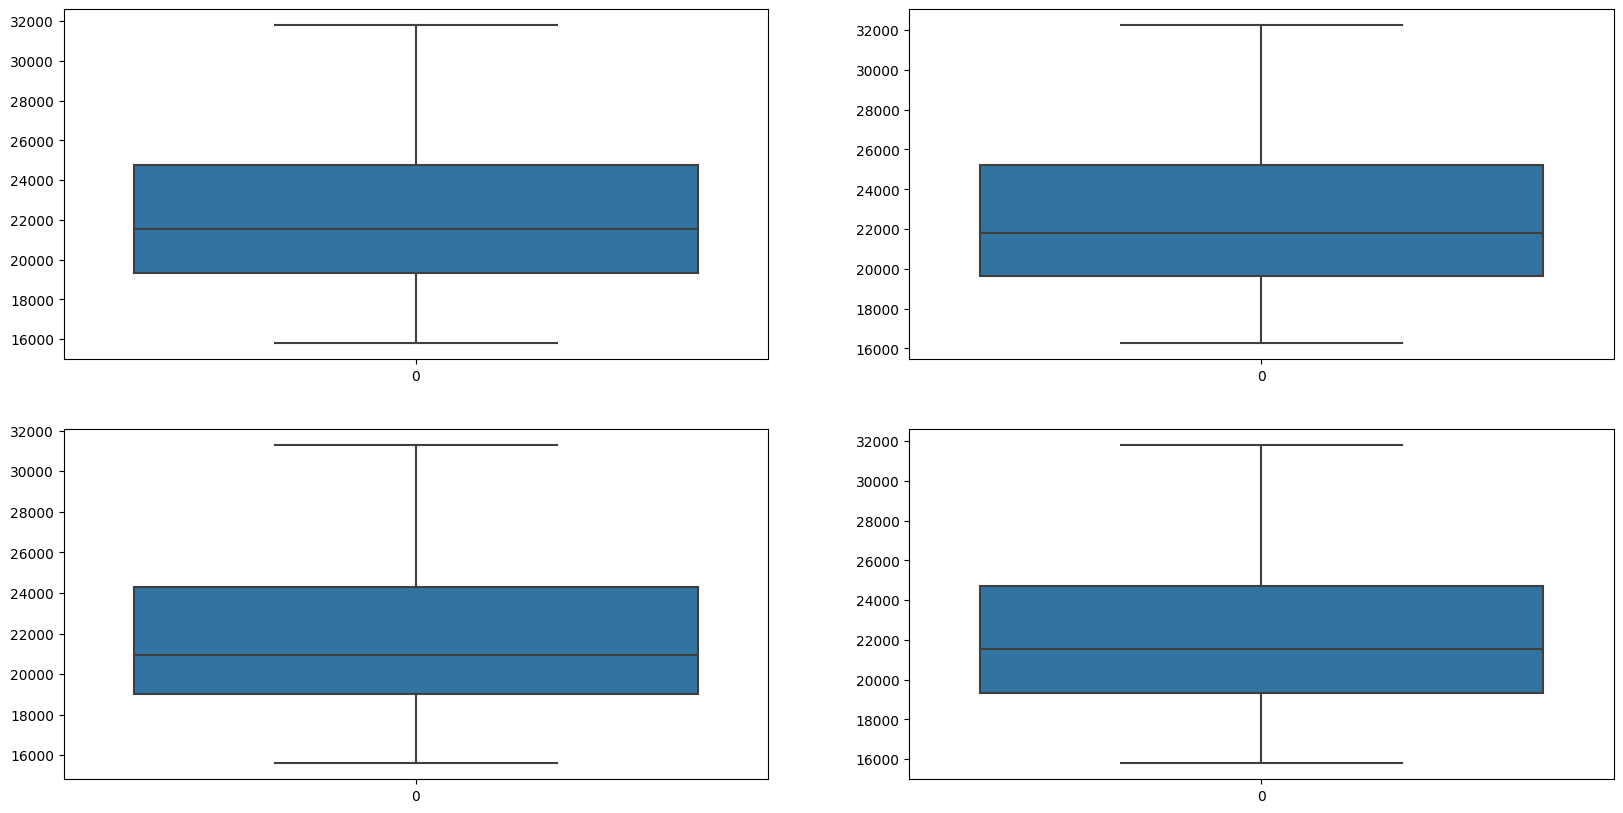

In [11]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.boxplot(df[col])
plt.show()


In [14]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2022-05-25,29653.134766,30157.785156,29384.949219,29562.361328,27525063551,2022,5,25
1,2022-05-26,29564.777344,29834.160156,28261.906250,29267.224609,36774325352,2022,5,26
2,2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,36582005748,2022,5,27
3,2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,35519577634,2022,5,28
4,2022-05-29,29019.867188,29498.009766,28841.107422,29445.957031,18093886409,2022,5,29


In [51]:
string= "3.141"

print(string)
print(type(string))

# converting string to float
Float = float(string)

print(Float)
print(type(Float))

float=float('year')
print(type('year'))

ValueError: could not convert string to float: 'year'

In [23]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

TypeError: Could not convert 2022-05-252022-05-262022-05-272022-05-282022-05-292022-05-302022-05-312022-06-012022-06-022022-06-032022-06-042022-06-052022-06-062022-06-072022-06-082022-06-092022-06-102022-06-112022-06-122022-06-132022-06-142022-06-152022-06-162022-06-172022-06-182022-06-192022-06-202022-06-212022-06-222022-06-232022-06-242022-06-252022-06-262022-06-272022-06-282022-06-292022-06-302022-07-012022-07-022022-07-032022-07-042022-07-052022-07-062022-07-072022-07-082022-07-092022-07-102022-07-112022-07-122022-07-132022-07-142022-07-152022-07-162022-07-172022-07-182022-07-192022-07-202022-07-212022-07-222022-07-232022-07-242022-07-252022-07-262022-07-272022-07-282022-07-292022-07-302022-07-312022-08-012022-08-022022-08-032022-08-042022-08-052022-08-062022-08-072022-08-082022-08-092022-08-102022-08-112022-08-122022-08-132022-08-142022-08-152022-08-162022-08-172022-08-182022-08-192022-08-202022-08-212022-08-222022-08-232022-08-242022-08-252022-08-262022-08-272022-08-282022-08-292022-08-302022-08-312022-09-012022-09-022022-09-032022-09-042022-09-052022-09-062022-09-072022-09-082022-09-092022-09-102022-09-112022-09-122022-09-132022-09-142022-09-152022-09-162022-09-172022-09-182022-09-192022-09-202022-09-212022-09-222022-09-232022-09-242022-09-252022-09-262022-09-272022-09-282022-09-292022-09-302022-10-012022-10-022022-10-032022-10-042022-10-052022-10-062022-10-072022-10-082022-10-092022-10-102022-10-112022-10-122022-10-132022-10-142022-10-152022-10-162022-10-172022-10-182022-10-192022-10-202022-10-212022-10-222022-10-232022-10-242022-10-252022-10-262022-10-272022-10-282022-10-292022-10-302022-10-312022-11-012022-11-022022-11-032022-11-042022-11-052022-11-062022-11-072022-11-082022-11-092022-11-102022-11-112022-11-122022-11-132022-11-142022-11-152022-11-162022-11-172022-11-182022-11-192022-11-202022-11-212022-11-222022-11-232022-11-242022-11-252022-11-262022-11-272022-11-282022-11-292022-11-302022-12-012022-12-022022-12-032022-12-042022-12-052022-12-062022-12-072022-12-082022-12-092022-12-102022-12-112022-12-122022-12-132022-12-142022-12-152022-12-162022-12-172022-12-182022-12-192022-12-202022-12-212022-12-222022-12-232022-12-242022-12-252022-12-262022-12-272022-12-282022-12-292022-12-302022-12-31 to numeric

In [24]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2022-05-25,29653.134766,30157.785156,29384.949219,29562.361328,27525063551,2022,5,25,0
1,2022-05-26,29564.777344,29834.160156,28261.906250,29267.224609,36774325352,2022,5,26,0
2,2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,36582005748,2022,5,27,0
3,2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,35519577634,2022,5,28,0
4,2022-05-29,29019.867188,29498.009766,28841.107422,29445.957031,18093886409,2022,5,29,0


In [25]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

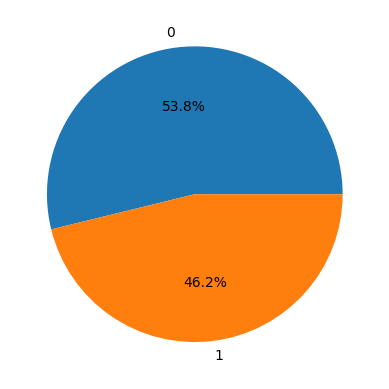

In [26]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()

In [28]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


ValueError: could not convert string to float: '2022-05-25'

<Figure size 1000x1000 with 0 Axes>

In [29]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(329, 3) (37, 3)


**Now we will apply classifiers for the predicting the corresponding**

In [30]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.49869781977825733
Validation Accuracy :  0.5116959064327485

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.47663516630701686
Validation Accuracy :  0.5584795321637427

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accu

In [32]:
lr=LogisticRegression(max_iter=1000,random_state=2000)

In [33]:
lr.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, random_state=2000)

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [35]:
lr.classes_

array([0, 1])

In [36]:
Y_test_predicted=lr.predict(X_train)

In [37]:
Y_test_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
cm=confusion_matrix(Y_train,Y_test_predicted,labels=lr.classes_)
print(cm)

[[178   0]
 [151   0]]


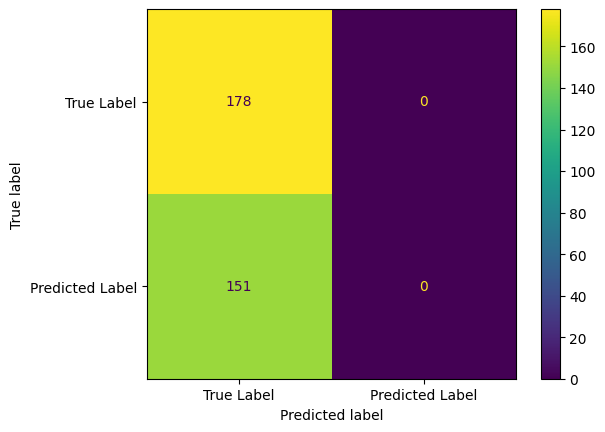

In [39]:
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True Label','Predicted Label'])
cm_disp.plot()

**Applying the KNN Classifier**

In [40]:
Classifier=KNeighborsClassifier(n_neighbors=5)
Classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [41]:
Y_test_predicted=Classifier.predict(X_valid)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid,Y_test_predicted))

              precision    recall  f1-score   support

           0       0.50      0.58      0.54        19
           1       0.47      0.39      0.42        18

    accuracy                           0.49        37
   macro avg       0.48      0.48      0.48        37
weighted avg       0.48      0.49      0.48        37



In [43]:
from sklearn import tree

In [44]:
input=df.drop('Date',axis='columns')
input

,Open,High,Low,Close,Volume,year,month,day,is_quarter_end,open-close,low-high,target
0,29653.134766,30157.785156,29384.949219,29562.361328,27525063551,2022,5,25,0,90.773438,-772.835937,0
1,29564.777344,29834.160156,28261.906250,29267.224609,36774325352,2022,5,26,0,297.552735,-1572.253906,0
2,29251.140625,29346.943359,28326.613281,28627.574219,36582005748,2022,5,27,0,623.566406,-1020.330078,1
3,28622.625000,28814.900391,28554.566406,28814.900391,35519577634,2022,5,28,0,-192.275391,-260.333985,1
4,29019.867188,29498.009766,28841.107422,29445.957031,18093886409,2022,5,29,0,-426.089843,-656.902344,1
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27118.423828,27265.917969,26706.921875,26753.826172,8647416921,2023,5,21,0,364.597656,-558.996094,1
362,26749.892578,27045.734375,26549.734375,26851.277344,11056770492,2023,5,22,0,-101.384766,-496.000000,1
363,26855.960938,27434.683594,26816.179688,27225.726563,13697203143,2023,5,23,0,-369.765625,-618.503906,0
364,27224.603516,27224.603516,26106.576172,26334.818359,16299104428,2023,5,24,0,889.785157,-1118.027344,0


In [45]:
models=tree.DecisionTreeClassifier()
models.fit(input,target)

DecisionTreeClassifier()

In [46]:
models.score(input,target)

1.0